## **IMPORTING LIBRARIES**

In [507]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb

import warnings 
warnings.filterwarnings('ignore',category=DeprecationWarning)

## **DATA COLLECTION AND ANALYSIS**

In [508]:
train=pd.read_csv('HousePrices_project.csv')


In [509]:
train.head(20)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No

In [510]:
def summary(train):
    sum = pd.DataFrame(train.dtypes, columns=['dtypes'])
    sum['missing#'] = train.isna().sum()
    sum['missing%'] = (train.isna().sum().values*100)/len(train)
    sum['uniques'] = train.nunique().values
    sum['count'] = train.count().values
    # sum['value_counts']=train.value_counts()
    # sum['skew'] = train.skew().values
    desc = pd.DataFrame(train.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(train).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Id,int64,0,0.000000,1820,2073,1.000000,1820.000000,916.132176
Dwell_Type,int64,0,0.000000,18,2073,20.000000,7080.000000,60.556199
Zone_Class,object,0,0.000000,5,2073,nan,nan,nan
LotFrontage,float64,320,15.436565,110,1753,21.000000,313.000000,72.056475
LotArea,int64,0,0.000000,1367,2073,1300.000000,215245.000000,10717.853353
Road_Type,object,0,0.000000,2,2073,nan,nan,nan
Alley,object,1944,93.777135,2,129,nan,nan,nan
Property_Shape,object,0,0.000000,4,2073,nan,nan,nan
LandContour,object,0,0.000000,4,2073,nan,nan,nan
Utilities,object,0,0.000000,2,2073,nan,nan,nan


## **Dropping unnecessary column**

In [511]:
train.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [512]:
pd.set_option('display.max_rows',None)
train.isnull().sum()

Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
Road_Type                0
Property_Shape           0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
Dwelling_Type            0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType              14
MasVnrArea              14
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                59
BsmtCond                59
BsmtExposure            61
BsmtFinType1            59
BsmtFinSF1               0
BsmtFinType2            60
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
H

## **Filling null values**

In [513]:
train[['LotFrontage','MasVnrArea','GarageYrBlt']]=train[['LotFrontage','MasVnrArea','GarageYrBlt']].fillna(train[['LotFrontage','MasVnrArea','GarageYrBlt']].mean())

In [514]:
for i in train.columns:
    if train[i].dtype=='object' and train[i].isnull().any():
        mode_value = train[i].mode()[0]
        train[i].fillna(mode_value, inplace=True)    
    elif train[i].dtype=='int64'or'float64':
        continue

In [515]:
train.duplicated().sum()

13

In [516]:
train.drop_duplicates(inplace=True)

## **DATA VISUALIZATION**

array([[<AxesSubplot:title={'center':'Dwell_Type'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

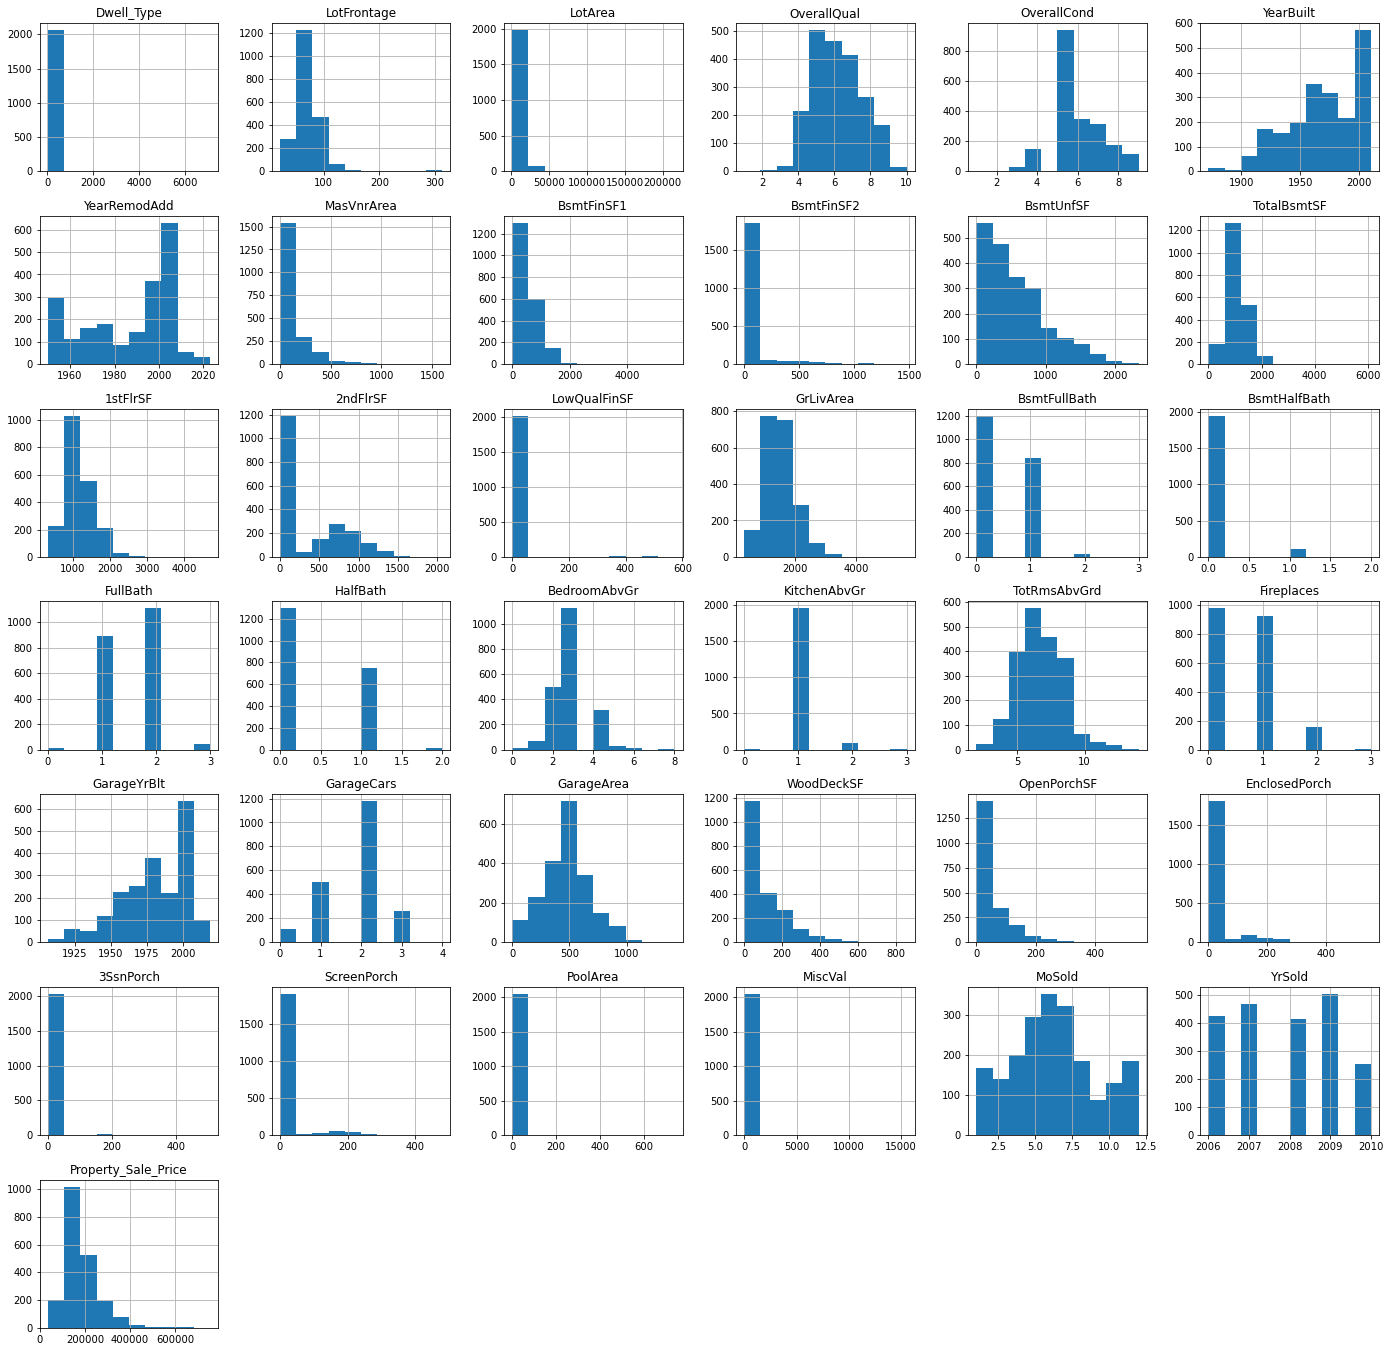

In [517]:
train.hist(figsize=(24,24))

<AxesSubplot:xlabel='Zone_Class', ylabel='count'>

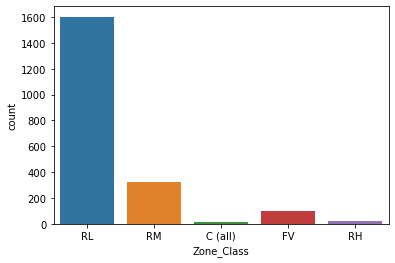

In [518]:
sns.countplot(data=train,x='Zone_Class')

<AxesSubplot:xlabel='Property_Shape', ylabel='count'>

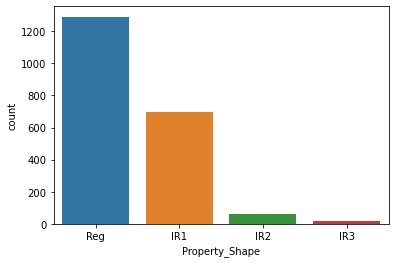

In [519]:
sns.countplot(data=train,x='Property_Shape')

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

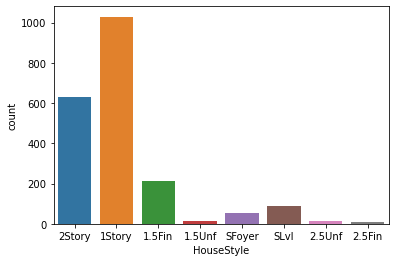

In [520]:
sns.countplot(data=train,x='HouseStyle')

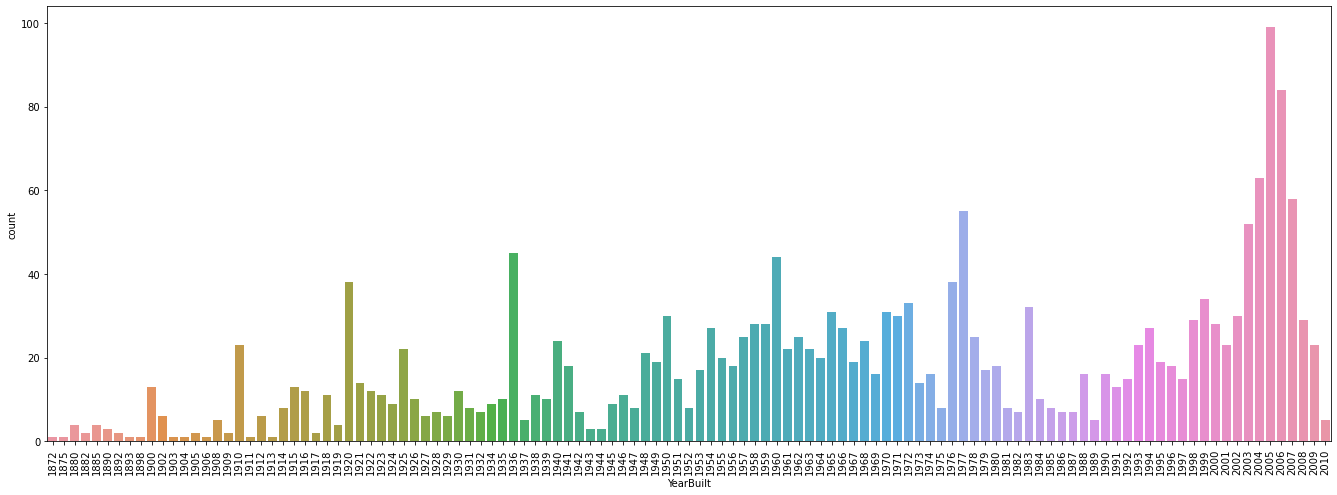

In [521]:
plt.figure(figsize=(23,8))
sns.countplot(data=train,x='YearBuilt')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Foundation', ylabel='count'>

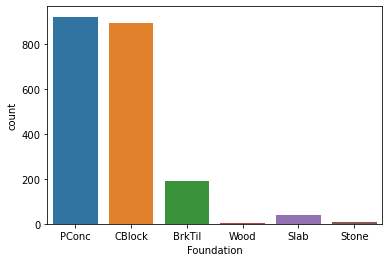

In [522]:
sns.countplot(data=train,x='Foundation')

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

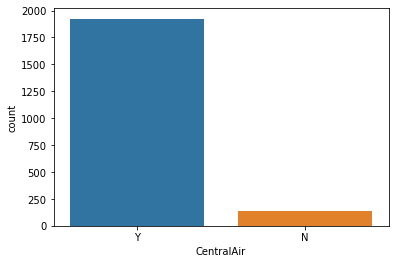

In [523]:
sns.countplot(data=train,x='CentralAir')

<AxesSubplot:xlabel='GarageType', ylabel='count'>

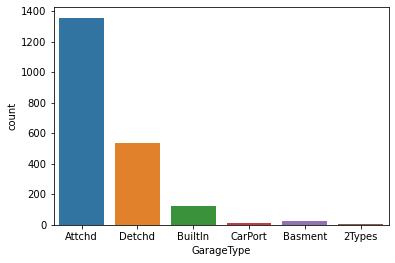

In [524]:
sns.countplot(data=train,x='GarageType')

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

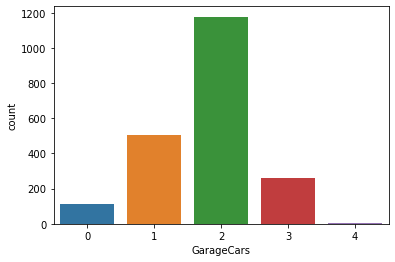

In [525]:
sns.countplot(data=train,x='GarageCars')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Property_Sale_Price', ylabel='Density'>

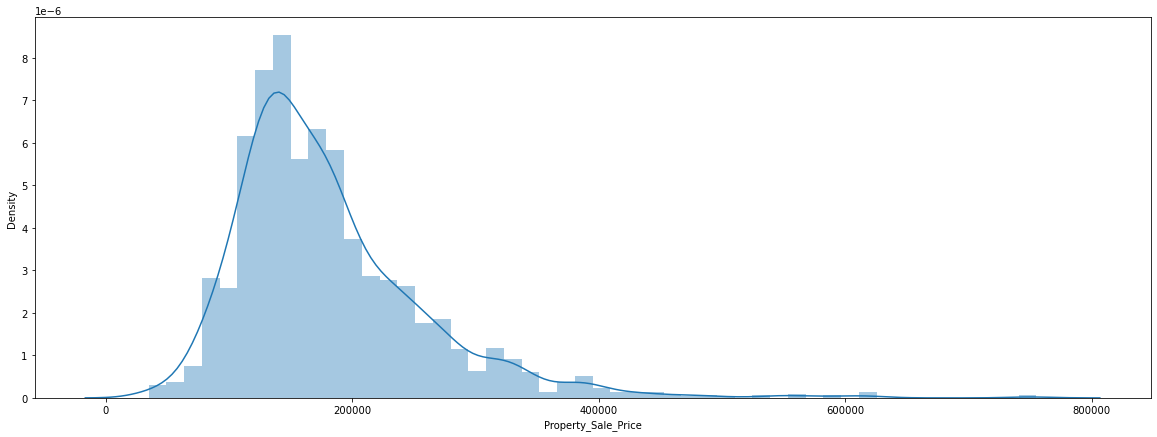

In [526]:
plt.figure(figsize=(20,7))
sns.distplot(train['Property_Sale_Price'])

<AxesSubplot:>

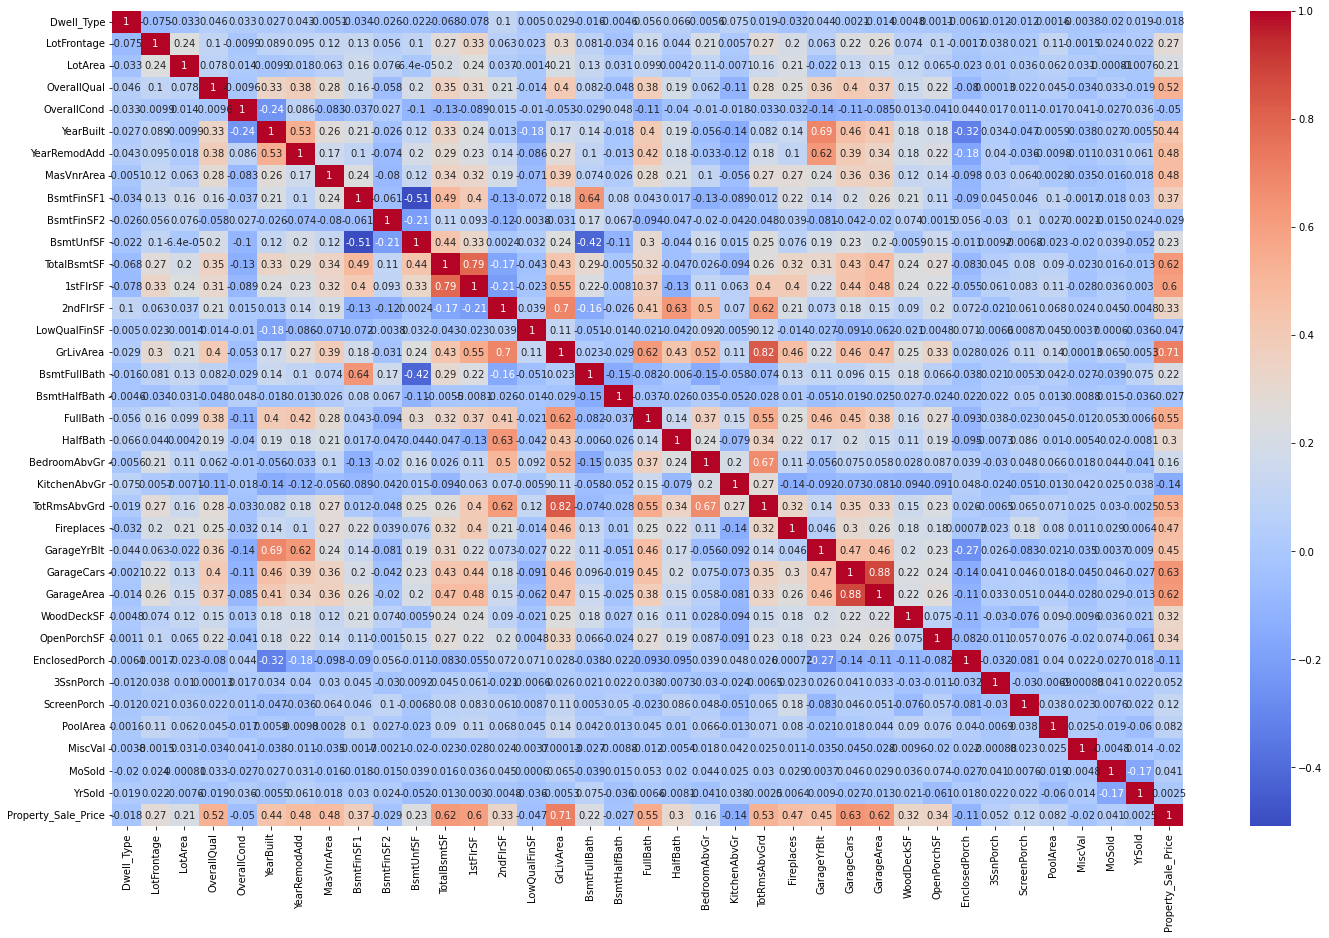

In [527]:
plt.figure(figsize=(24,15))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

## **HANDLING OUTLIERS**

<AxesSubplot:>

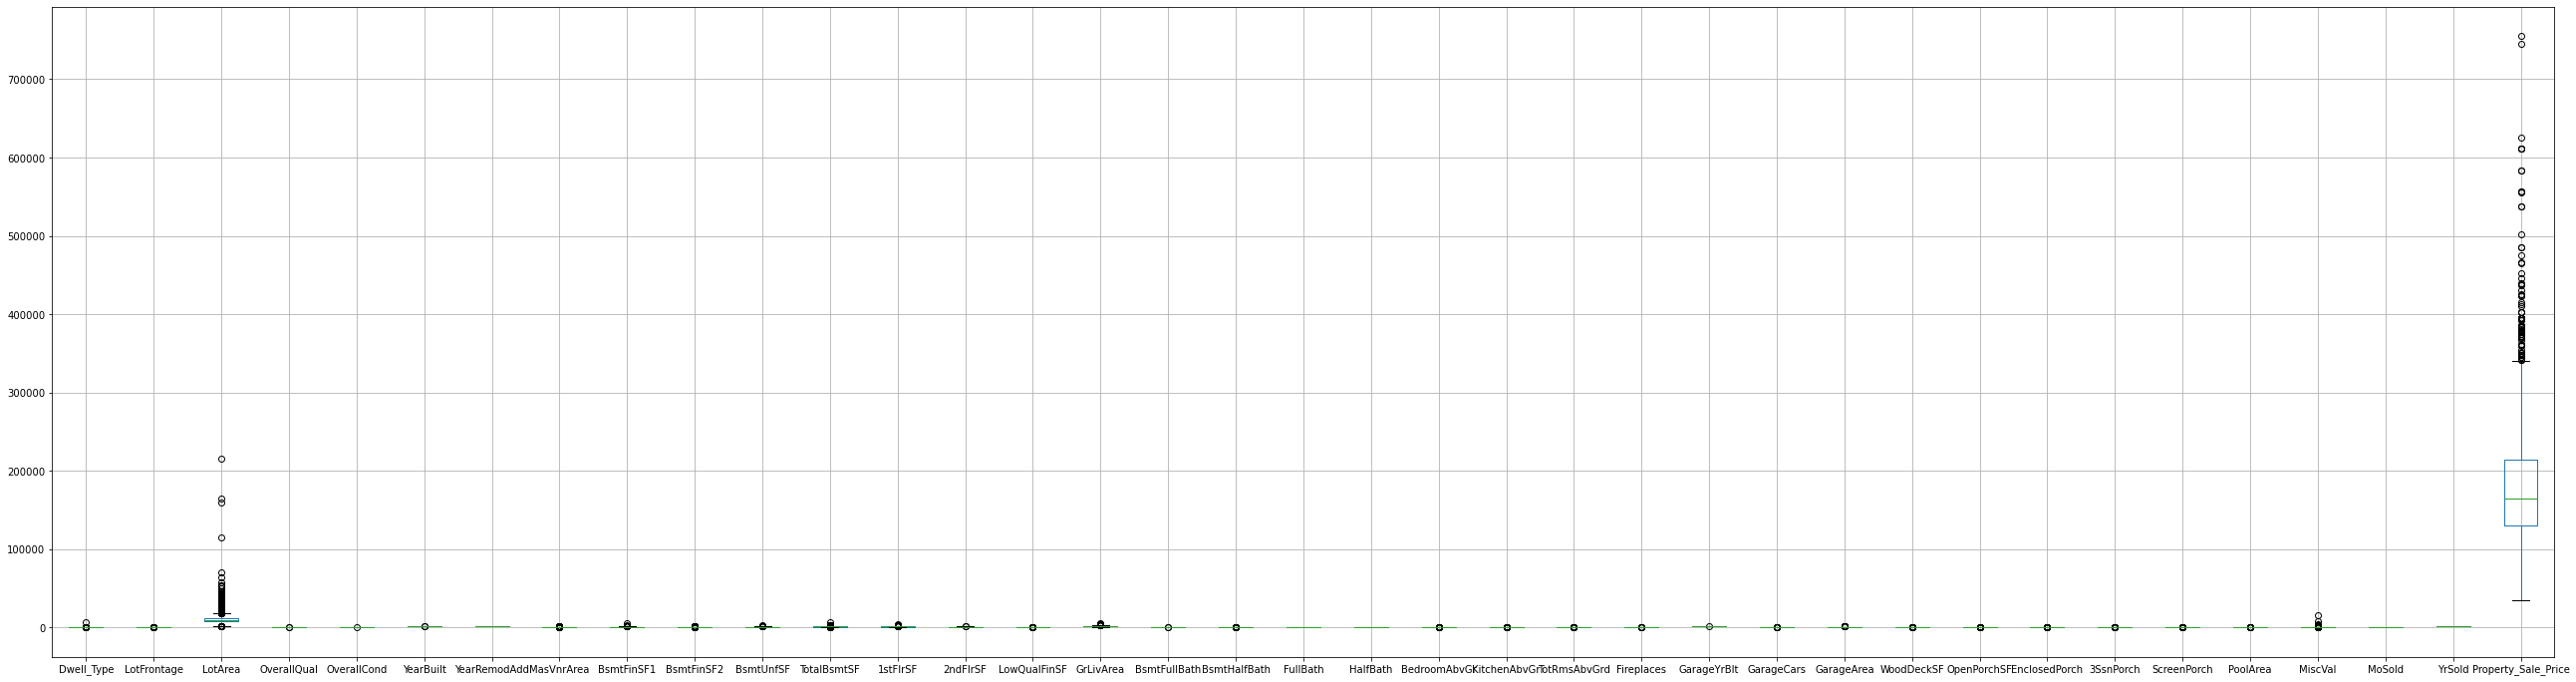

In [528]:
plt.figure(figsize=(45,12))
train.boxplot()

In [529]:
import pandas as pd

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

def detect_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = train[(train[column] < lower_bound) | (train[column] > upper_bound)]
    if outliers.empty:
        return None, 0.0
    else:
        percentage = (len(outliers) / len(train)) * 100
        return column, percentage

numeric_columns = train.select_dtypes(include=['number']).columns
columns_with_outliers = [detect_outliers(column) for column in numeric_columns]
columns_with_outliers = [(column, percentage) for column, percentage in columns_with_outliers if column is not None]

for column, percentage in columns_with_outliers:
    print(f"Column: {column}, Percentage of outliers: {percentage:.2f}%")


Column: Dwell_Type, Percentage of outliers: 7.18%
Column: LotFrontage, Percentage of outliers: 5.78%
Column: LotArea, Percentage of outliers: 7.14%
Column: OverallQual, Percentage of outliers: 0.10%
Column: OverallCond, Percentage of outliers: 0.05%
Column: YearBuilt, Percentage of outliers: 0.10%
Column: MasVnrArea, Percentage of outliers: 6.94%
Column: BsmtFinSF1, Percentage of outliers: 0.58%
Column: BsmtFinSF2, Percentage of outliers: 11.80%
Column: BsmtUnfSF, Percentage of outliers: 1.99%
Column: TotalBsmtSF, Percentage of outliers: 4.17%
Column: 1stFlrSF, Percentage of outliers: 1.26%
Column: 2ndFlrSF, Percentage of outliers: 0.10%
Column: LowQualFinSF, Percentage of outliers: 1.89%
Column: GrLivArea, Percentage of outliers: 1.89%
Column: BsmtFullBath, Percentage of outliers: 0.10%
Column: BsmtHalfBath, Percentage of outliers: 5.53%
Column: BedroomAbvGr, Percentage of outliers: 2.33%
Column: KitchenAbvGr, Percentage of outliers: 5.10%
Column: TotRmsAbvGrd, Percentage of outliers:

<AxesSubplot:>

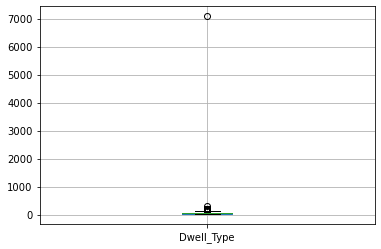

In [530]:
train.boxplot(column=['Dwell_Type'])

<AxesSubplot:>

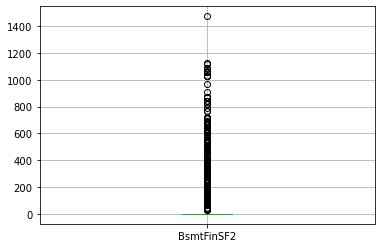

In [531]:
train.boxplot(column=['BsmtFinSF2'])


<AxesSubplot:>

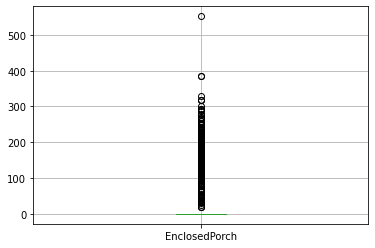

In [532]:
train.boxplot(column=['EnclosedPorch'])


<AxesSubplot:>

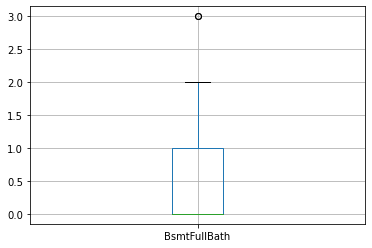

In [533]:
train.boxplot(column=['BsmtFullBath'])


## **REMOVING OUTLIERS**

In [534]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    return lower_range,upper_range

In [535]:
low_leadtime,high_leadtime=remove_outlier(train['Dwell_Type'])
train['Dwell_Type']=np.where(train['Dwell_Type']>high_leadtime,high_leadtime,train['Dwell_Type'])
train['Dwell_Type']=np.where(train['Dwell_Type']<low_leadtime,low_leadtime,train['Dwell_Type'])

In [536]:
low_leadtime,high_leadtime=remove_outlier(train['LotArea'])
train['LotArea']=np.where(train['LotArea']>high_leadtime,high_leadtime,train['LotArea'])
train['LotArea']=np.where(train['LotArea']<low_leadtime,low_leadtime,train['LotArea'])

In [537]:
low_leadtime,high_leadtime=remove_outlier(train['Property_Sale_Price'])
train['Property_Sale_Price']=np.where(train['Property_Sale_Price']>high_leadtime,high_leadtime,train['Property_Sale_Price'])
train['Property_Sale_Price']=np.where(train['Property_Sale_Price']<low_leadtime,low_leadtime,train['Property_Sale_Price'])

## **ENCODING**

In [539]:
lst=[]
for i in train.columns:
    if train[i].dtype=='object':
        lst.append(i)
lst

['Zone_Class',
 'Road_Type',
 'Property_Shape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [540]:
ohe=OneHotEncoder()
train_enc = pd.get_dummies(train, columns = ['Zone_Class',
 'Road_Type',
 'Property_Shape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Dwelling_Type',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition'])


## **SPLITTING**

In [541]:
x=train_enc.drop(['Property_Sale_Price'],axis=1)
y=train_enc['Property_Sale_Price']

In [542]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=142)

## **SCALING**

In [543]:
scalar=StandardScaler()
scalar.fit(xtrain)
xtrain_sc=scalar.transform(xtrain)
xtest_sc=scalar.transform(xtest)

## **MODELLING**

## **LinearRegression**

In [544]:
lr=LinearRegression()
lr.fit(xtrain_sc,ytrain)
ypred_train=lr.predict(xtrain_sc)
ypred_test=lr.predict(xtest_sc)


In [545]:
print(r2_score(ytrain,ypred_train))

0.9336224183665331


## **RandomForestRegressor**

In [546]:
rf=RandomForestRegressor(n_estimators=550,max_depth=65,min_samples_split=15,min_samples_leaf=5)
rf.fit(xtrain_sc,ytrain)
ypred_train_rf=rf.predict(xtrain_sc)
ypred_test_rf=rf.predict(xtest_sc)

In [547]:
print(r2_score(ytrain,ypred_train_rf))
print(r2_score(ytest,ypred_test_rf)) 

0.9528780637072546
0.8820453558454204


## **XGBRegressor**

In [548]:
XGBoost=xgb.XGBRegressor()            
XGBoost.fit(xtrain_sc,ytrain)
ypred_train_XGBoost = XGBoost.predict(xtrain_sc)
ypred_test_XGBoost = XGBoost.predict(xtest_sc)

In [549]:
print(r2_score(ytrain,ypred_train_XGBoost))
print(r2_score(ytest,ypred_test_XGBoost)) 

0.99930424462454
0.9211929351930501


## **Lasso**

In [550]:
las=Lasso(alpha=0.6)
las.fit(xtrain_sc,ytrain)
ypred_train_las = las.predict(xtrain_sc)
ypred_test_las = las.predict(xtest_sc)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.303e+10, tolerance: 7.345e+08
  model = cd_fast.enet_coordinate_descent(


In [551]:
print(r2_score(ytrain,ypred_train_las))
print(r2_score(ytest,ypred_test_las)) 

0.933637031343258
0.9105037997987064


In [552]:
final_data=pd.DataFrame({'Models':['LR','RF','XGB','LS'],
                'ACC':[r2_score(ytrain,ypred_train)*100,
                        r2_score(ytrain,ypred_train_rf)*100,
                        r2_score(ytrain,ypred_train_XGBoost)*100,
                        r2_score(ytrain,ypred_train_las)*100]})

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

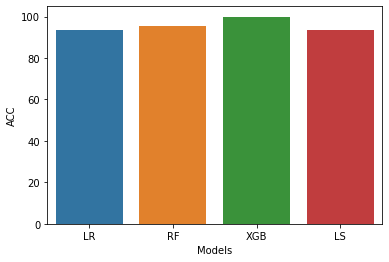

In [553]:
sns.barplot(final_data['Models'],final_data['ACC'])